# Feature Selection
Time to exact some audio features

In [1]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import zipfile
# Audio Processing
import librosa
import librosa.display
import sounddevice as sd
import soundfile as sf

In [2]:
# open zip files
if 'Clean Audio' not in os.listdir():
    with zipfile.ZipFile("Clean Audio.zip","r") as zip_ref:
        zip_ref.extractall()

In [3]:
# open the legend
data = pd.read_csv('CSVs/Audio Data.csv',index_col='Unnamed: 0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8833 entries, 0 to 8832
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   statment     8833 non-null   int64 
 1   emotion      8833 non-null   object
 2   og filename  8833 non-null   object
 3   sex          8833 non-null   object
 4   filenames    8833 non-null   object
dtypes: int64(1), object(4)
memory usage: 414.0+ KB


# Get Features
open wav files and save features in a dataframe
 - currently only have the mel-frequency spectrogram

In [6]:
# open wav files
audio = pd.DataFrame()
count = 1
for path in data['filenames']:
    # get autio and sample rate
    clip, samplerate = sf.read(path)
    # get mel-frequency spectrogram
    mls = librosa.feature.melspectrogram(clip,samplerate)
    # append arrays to a dataframe
    audio = audio.append(pd.DataFrame([path,clip,samplerate,mls]).T)
    # progress bar
    print('%4d of %4d complete (%d%%)' % (count,len(data['filenames']),
                                         (count/len(data['filenames']))*100),end='\r')
    count+=1

In [10]:
audio.columns = ['filename','audio','sample rate','melspectrogram']
audio.index = pd.RangeIndex(0,len(audio))
audio.head()

,filename,audio,sample rate,melspectrogram
0,Clean Audio/Clip_0000.wav,"[0.00531005859375, 0.005157470703125, 0.005401...",16000,"[[0.002243550915605842, 0.011167974521780753, ..."
1,Clean Audio/Clip_0001.wav,"[0.002044677734375, -0.000396728515625, -0.001...",16000,"[[0.0011843090924812847, 0.00284435626350834, ..."
2,Clean Audio/Clip_0002.wav,"[0.00640869140625, 0.005157470703125, 0.007354...",16000,"[[0.017193924009822815, 0.030587701900579384, ..."
3,Clean Audio/Clip_0003.wav,"[-0.0062255859375, -0.00537109375, -0.00738525...",16000,"[[0.005225828622143921, 0.01800050464758304, 0..."
4,Clean Audio/Clip_0004.wav,"[-0.008636474609375, -0.0081787109375, -0.0083...",16000,"[[0.0022524330855302273, 0.001286378034361137,..."


# Example Plots

C:\Users\tarac\anaconda3\envs\pythonProject\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tarac\anaconda3\envs\pythonProject\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


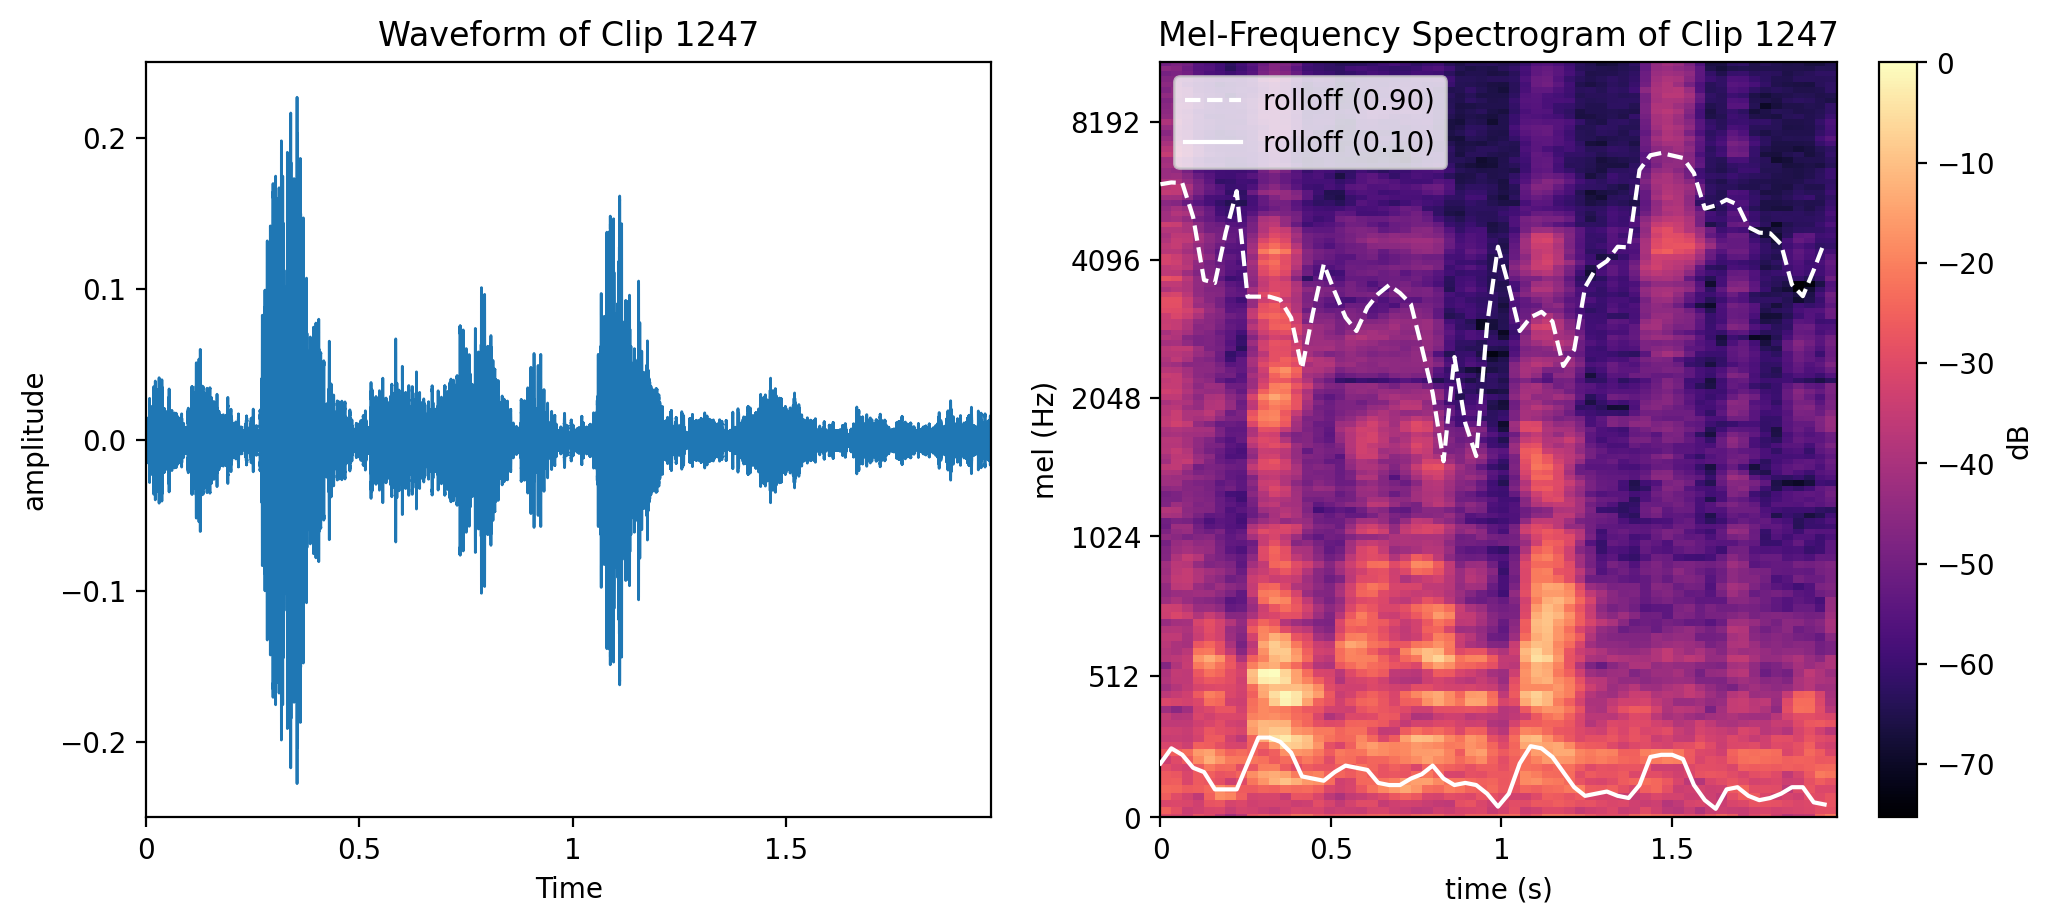

In [14]:
# plots a random audio clip
n = np.random.randint(0,len(audio))
test = audio.iloc[n]

x, sr, mel = test['audio'], test['sample rate'], test['melspectrogram']
t_max = len(x)/sr

plt.figure(figsize=(12,5),dpi=200)
plt.subplots_adjust(wspace=0.2)

# plots the waveform
plt.subplot(121)
librosa.display.waveplot(x, sr=sr)
plt.title('Waveform of Clip %-4d' % n)
plt.ylabel('amplitude')

# plots the mel-frequency spectrogram
plt.subplot(122)
S_dB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(data=S_dB,sr=sr, x_axis='time',y_axis='mel')
plt.colorbar(label='dB')
plt.title('Mel-Frequency Spectrogram of Clip %-4d' % n)
plt.xlabel('time (s)')
plt.ylabel('mel (Hz)')

#plot spectral rolloff
rolloff_90 = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.90)[0]
rolloff_10 = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.10)[0]
t = np.arange(0,t_max,t_max/len(rolloff_90))
plt.plot(t,rolloff_90,zorder=5,c='white',linestyle='--',label='rolloff (0.90)')
plt.plot(t,rolloff_10,zorder=6,c='white',linestyle='-',label='rolloff (0.10)')
plt.legend();